<a href="https://colab.research.google.com/github/Sai25Hajime/CognifyZTech_Level2_Task2/blob/main/CognifyZTech_Level2_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting the Google Drive

First we mount the google drive since that is where the dataset will be stored.

In [9]:
#Both are used to import the drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing libraries

Importing libraries is standard practice when coding or working with datasets. In this case we are importing the Pandas, MatPlotlib and Seaborn libraries. We are also importing the display libraries.

In [10]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

Now we load the dataset. Since we have uploaded it from Google Drive. We need to put that path instead of the local path.

In [11]:
# Load the dataset
file_path = "/content/drive/MyDrive/Datasets/cognifyz_dataset.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Displaying the Rows

First we will display few rows to get an idea of the dataset.

In [12]:
# Display the first few rows
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Determining the Most Common Price Range

We now determine the most common price range and plot it using Matplotlib and Seaborn.

📌 Most common price range: 1


<ipython-input-13-b39e59ae0e7d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Price range'], palette="viridis")


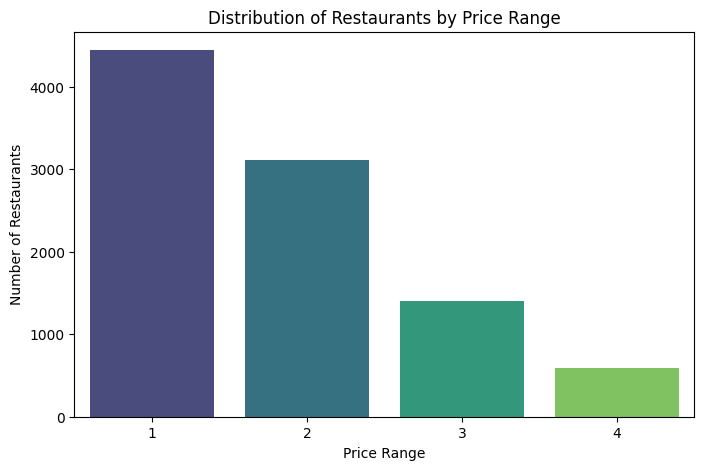

In [13]:
### 1. Determine the Most Common Price Range ###

most_common_price_range = df['Price range'].mode()[0]
print(f"📌 Most common price range: {most_common_price_range}")

# Visualizing the distribution of price ranges
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Price range'], palette="viridis")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurants by Price Range")
plt.show()

# Calculate the Average Rating

Here we calculate the average rating for each price range.


⭐ Average Rating for Each Price Range:
    Price range  Aggregate rating
0            1          1.999887
1            2          2.941054
2            3          3.683381
3            4          3.817918


<ipython-input-14-b63bf82c6fbe>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_per_price['Price range'], y=avg_rating_per_price['Aggregate rating'], palette="coolwarm")


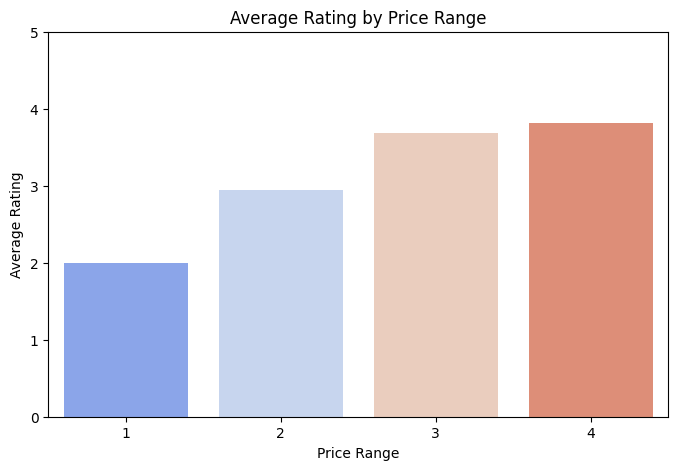

In [14]:
### 2. Calculate Average Rating for Each Price Range ###

avg_rating_per_price = df.groupby('Price range')['Aggregate rating'].mean().reset_index()

print("\n⭐ Average Rating for Each Price Range:\n", avg_rating_per_price)

# Visualizing the average ratings per price range
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_rating_per_price['Price range'], y=avg_rating_per_price['Aggregate rating'], palette="coolwarm")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.title("Average Rating by Price Range")
plt.ylim(0, 5)  # Assuming ratings are between 0-5
plt.show()

# Representing the Highest Average Rating

We represent the highest average by selecting the best color for the representation.

In [15]:
### 3. Identify the Color Representing the Highest Average Rating ###
# Using seaborn's color palette to get the best color
highest_avg_rating = avg_rating_per_price.loc[avg_rating_per_price['Aggregate rating'].idxmax()]
best_color = sns.color_palette("coolwarm", as_cmap=True)(highest_avg_rating['Aggregate rating'] / 5)

print(f"🎨 Color representing the highest average rating ({highest_avg_rating['Aggregate rating']:.2f}): {best_color}")

🎨 Color representing the highest average rating (3.82): (np.float64(0.951253794882353), np.float64(0.5787993895882353), np.float64(0.4594078057647059), np.float64(1.0))
